# Plant Disease Prediction

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
# Define the input shape for the first layer explicitly
input_shape = (128, 128, 3)  # Assuming 128x128 RGB images
# Add the input layer
cnn.add(tf.keras.layers.InputLayer(input_shape=input_shape))
# Add convolutional layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

C:\Users\uijyn\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
# To avoid Overshooting Loss function
# 1. Choose small learning rate default 0.001 here we have taken 0.0001
# 2. There may be chance of underfitting so increase number of neuron
# 3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

In [15]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [16]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# taking learning rate as 0.0001 to reduce overfitting 

In [17]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1723s 782ms/step - accuracy: 0.4050 - loss: 2.1016 - val_accuracy: 0.8287 - val_loss: 0.5451
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1675s 762ms/step - accuracy: 0.8388 - loss: 0.5153 - val_accuracy: 0.9039 - val_loss: 0.3042
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1675s 763ms/step - accuracy: 0.9027 - loss: 0.3008 - val_accuracy: 0.9313 - val_loss: 0.2128
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1677s 763ms/step - accuracy: 0.9328 - loss: 0.2056 - val_accuracy: 0.9363 - val_loss: 0.2044
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1682s 766ms/step - accuracy: 0.9523 - loss: 0.1456 - val_accuracy: 0.9128 - val_loss: 0.2690
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1679s 764ms/step - accuracy: 0.9607 - loss: 0.1206 - val_accuracy: 0.9432 - val_loss: 0.1864
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1674s 762ms/step - accuracy: 0.9686 - loss: 0.0918 - val_accuracy: 0.9526 - val_loss: 0.1534
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1670s 760ms/s

## Evaluating Model

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 413s 188ms/step - accuracy: 0.9809 - loss: 0.0572
Training accuracy: 0.982545018196106


In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 101s 183ms/step - accuracy: 0.9486 - loss: 0.1741
Validation accuracy: 0.9516276121139526


### Saving Model

In [21]:
cnn.save('trained_plant_disease_model.keras')

In [22]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6059321165084839,
  0.8620954751968384,
  0.9128387570381165,
  0.938174843788147,
  0.9554306864738464,
  0.9632406234741211,
  0.9700689911842346,
  0.9748346209526062,
  0.9804680347442627,
  0.9808663725852966],
 'loss': [1.3318560123443604,
  0.43723344802856445,
  0.2680770754814148,
  0.18822097778320312,
  0.13546542823314667,
  0.10937441885471344,
  0.08936220407485962,
  0.07599536329507828,
  0.061869066208601,
  0.05983851104974747],
 'val_accuracy': [0.8287047743797302,
  0.9038811922073364,
  0.9313111901283264,
  0.9362622499465942,
  0.9127589464187622,
  0.9432051181793213,
  0.952595055103302,
  0.9512861371040344,
  0.9571477174758911,
  0.9516276121139526],
 'val_loss': [0.5450533032417297,
  0.3041846454143524,
  0.2128394991159439,
  0.2044426053762436,
  0.26898622512817383,
  0.18637433648109436,
  0.15339940786361694,
  0.16668714582920074,
  0.15549956262111664,
  0.16111837327480316]}

In [23]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)
  # file saved as .json in the same directory
  #contains accuracy of train and valid set of each epochs 

In [24]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

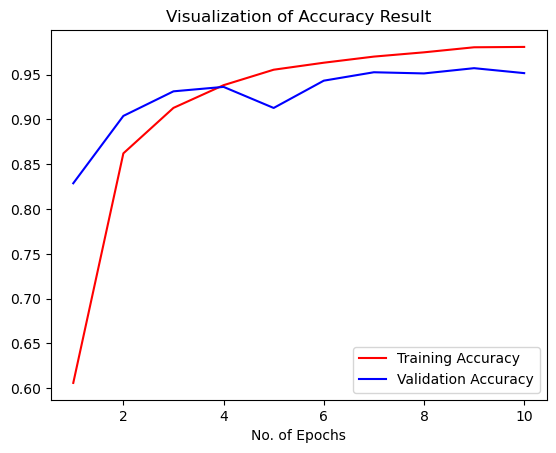

In [25]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')     # plot for   training accuracy
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy') #plot for validation accuracy
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [26]:
class_name = validation_set.class_names

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',                     # hear taking valid set as test_set for evaluation 
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,              # now taking in sequential manner 
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [28]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
# returns list of prectictions - returns ( index ( 0 , 37 ) ) from the probablities
# takes maximum from each row ( axis = 1 ) ans returns its index 

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 286s 16ms/step


In [29]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
# same thing is done to the true test but the maximum vaue is always 1 and others are 0 as it is true set 
# returns the index of max element and is returned as list 

In [30]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [31]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [32]:
from sklearn.metrics import classification_report

In [33]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

#                            positive( actual ) negative ( actual )
# positive ( predicted )    True Positive- TP   False Positive - FP
# negative ( predicted )    False Negative-FN   True Negative- TN
#
# precision = ΣTP / Σ ( TP + FP )
# recall = ΣTP / Σ ( TP + FN )
# f1-score = 2*precision*recall / ( precison + recall ) "harmonic mean"
# accuracy = Σ ( TP + TN ) / Σ ( TP + FP + FN + TN )


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.81      0.89       504
                                 Apple___Black_rot       0.99      0.96      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.78      0.99      0.87       502
                               Blueberry___healthy       0.99      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.92      0.99      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.95      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.92      0.

### Confusion Matrix Visualization

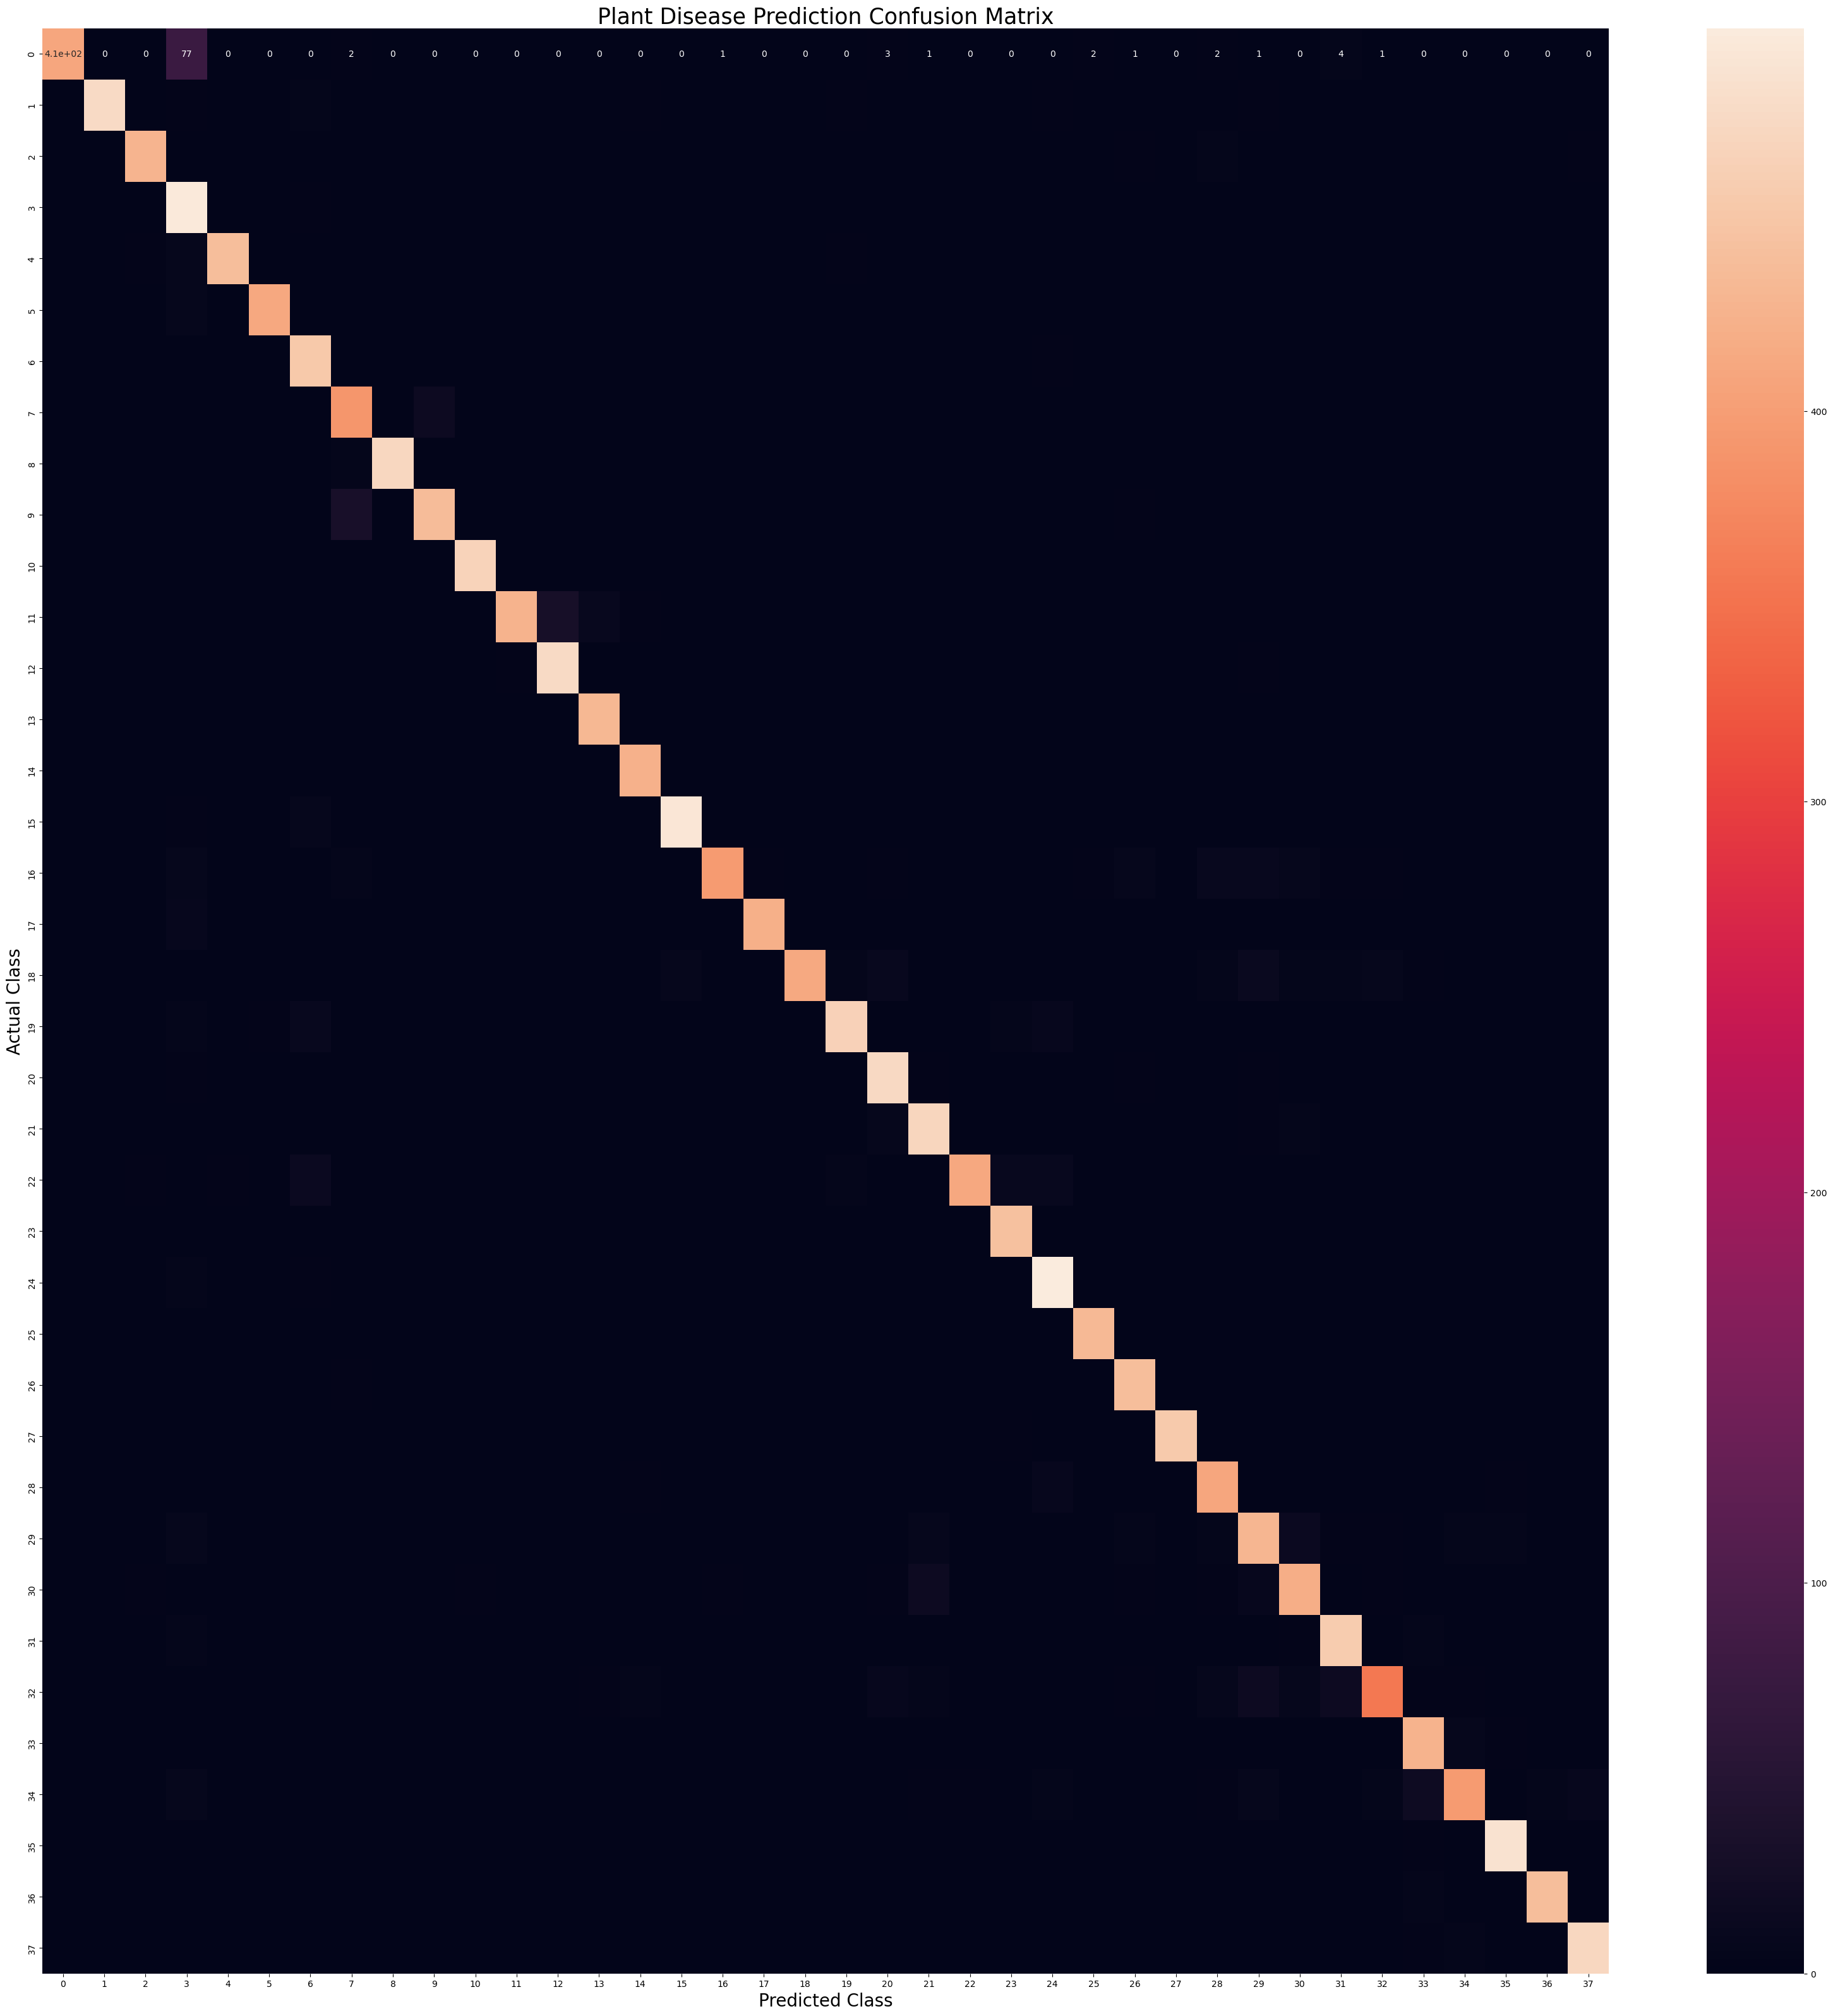

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,predicted_categories)

plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()